In [1]:
import numpy as np
import pandas as pd
import string

In [2]:
df=pd.read_csv("C:\\Users\\user\\Desktop\\spam.csv",encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN
3853,ham,oh ya... Got hip hop open. Haha i was thinking...,NaN,NaN,NaN
1774,ham,"Its ok chikku, and its my 1 of favourite song....",NaN,NaN,NaN
1991,ham,No other Valentines huh? The proof is on your ...,NaN,NaN,NaN
2035,ham,Simply sitting and watching match in office..,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### removing last three columns

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# renaming columns
df.rename(columns={'v1':'target','v2':'msg'},inplace=True)

In [9]:
df.sample(5)

,target,msg
2095,ham,"Probably, want to pick up more?"
5200,spam,Call Germany for only 1 pence per minute! Call...
5493,ham,I think if he rule tamilnadu..then its very to...
5515,ham,You are a great role model. You are giving so ...
1373,spam,"Bears Pic Nick, and Tom, Pete and ... Dick. In..."


### transforming the ham and spam into numerical data by using LabelEncoder from sklearn

In [10]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder().fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [11]:
df['target']=LabelEncoder().fit_transform(df['target'])

In [12]:
df.sample(5)

,target,msg
1019,0,Don know..wait i will check it.
1969,1,You have won a guaranteed å£200 award or even ...
846,0,My stomach has been thru so much trauma I swea...
4802,0,How do you plan to manage that
1876,0,Watching tv now. I got new job :)


In [13]:
# check whether the data has missing values
df.isnull().sum()

target    0
msg       0
dtype: int64

In [14]:
#check wheher it has duplicates or not
df.duplicated().sum()

403

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# 2.EDA


In [18]:
#counting values
a=df['target'].value_counts()
a

target
0    4516
1     653
Name: count, dtype: int64

In [19]:
#representing it in a pie chart
import matplotlib.pyplot as plt

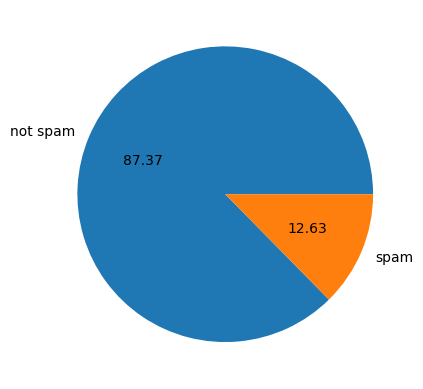

In [20]:
plt.pie(a,labels=['not spam','spam'],autopct="%0.2f")
plt.show()

In [21]:
import nltk


In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
#no.of characters
df['no_of_characters']=df['msg'].apply(len)

In [24]:
df.head()

,target,msg,no_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#no.of words
no_of_words=df['msg'].apply(lambda x:len(nltk.word_tokenize(x)))
no_of_words

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: msg, Length: 5169, dtype: int64

In [26]:
df["no_of_words"]=no_of_words


In [27]:
df.head()

,target,msg,no_of_characters,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['msg'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: msg, Length: 5169, dtype: object

In [29]:
df['no_of_sentences']=df['msg'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,msg,no_of_characters,no_of_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['no_of_characters','no_of_words','no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#summarizing ham
df[df['target']==0][['no_of_characters','no_of_words','no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#summarizing spam
df[df['target']==1][['no_of_characters','no_of_words','no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
ham= df[df['target']==0]['no_of_characters']
ham

0       111
1        29
3        49
4        61
6        77
       ... 
5565     12
5568     37
5569     57
5570    125
5571     26
Name: no_of_characters, Length: 4516, dtype: int64

In [35]:
spam= df[df['target']==1]['no_of_characters']
spam

2       155
5       148
8       158
9       154
11      136
       ... 
5537     90
5540    160
5547    160
5566    147
5567    161
Name: no_of_characters, Length: 653, dtype: int64

(array([  7.,  16.,  23.,  23.,  47., 114., 358.,  62.,   2.,   1.]),
 array([ 13. ,  34.1,  55.2,  76.3,  97.4, 118.5, 139.6, 160.7, 181.8,
        202.9, 224. ]),
 <BarContainer object of 10 artists>)

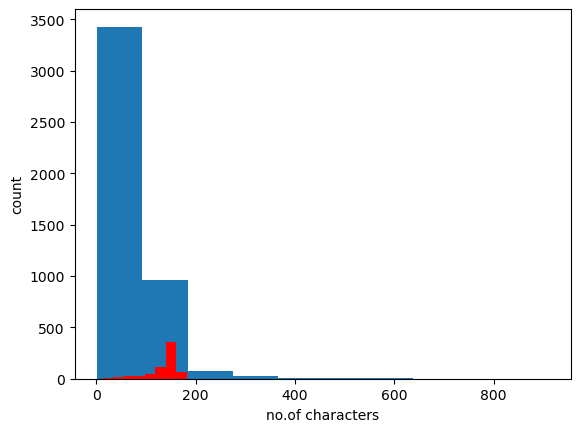

In [36]:
plt.hist(ham)
plt.xlabel("no.of characters")
plt.ylabel("count")
plt.hist(spam,color='red')

In [37]:
wham= df[df['target']==0]['no_of_words']
wham

0       24
1        8
3       13
4       15
6       18
        ..
5565     4
5568     9
5569    15
5570    27
5571     7
Name: no_of_words, Length: 4516, dtype: int64

In [38]:
wspam= df[df['target']==1]['no_of_words']
wspam


2       37
5       39
8       32
9       31
11      31
        ..
5537    18
5540    38
5547    35
5566    30
5567    35
Name: no_of_words, Length: 653, dtype: int64

(array([  5.,  20.,  24.,  31.,  53., 181., 199., 117.,  17.,   6.]),
 array([ 2. ,  6.4, 10.8, 15.2, 19.6, 24. , 28.4, 32.8, 37.2, 41.6, 46. ]),
 <BarContainer object of 10 artists>)

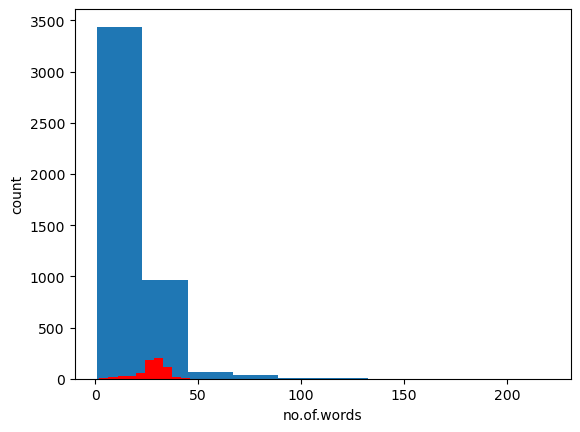

In [39]:
plt.hist(wham)
plt.xlabel("no.of.words")
plt.ylabel("count")
plt.hist(wspam,color='red')

In [40]:
import seaborn as sns

# Data preprocessing

* lower case
* tockenization
* removing special characters
* removing stop words and punctuation
* stemming

In [42]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')


'love'

In [45]:
def transform(text):
    # changing case
    text=text.lower()
    # tockenizing
    text=nltk.word_tokenize(text)
    # removing special characters
    li=[]
    for i in text:
        if i.isalnum():
            li.append(i)
    text=li.copy()
    li.clear()
    # removing stopwords
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            li.append(i)
    text=li.copy()
    li.clear()
    for i in text:
        li.append(ps.stem(i))
        
    
        
    return " ".join(li)

In [46]:
transform("Hi Tanu ! are you there. loved the way.")

'hi tanu love way'

In [ ]:
df['transformed_msg']=df['msg'].apply(transform)


In [ ]:
df.head()

In [ ]:
 spam=df[df['target']==1]['transformed_msg'].tolist()
 

In [ ]:
listofswords=[]
for msg in spam:
    for word in msg.split():
        listofswords.append(word)
    

In [ ]:
listofswords

In [ ]:
from collections import Counter
spamwordcount=Counter(listofswords).most_common(30)
spamwordcount

In [ ]:
df2=pd.DataFrame(spamwordcount)
df2

In [ ]:
sns.barplot(x=df2[0],y=df2[1],data=df2)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
 ham=df[df['target']==0]['transformed_msg'].tolist()
 ham

In [ ]:
listofhwords=[]
for msg in ham:
    for word in msg.split():
        listofhwords.append(word)
    

In [ ]:
listofhwords

In [ ]:
hamwordcount=Counter(listofhwords).most_common(30)
hamwordcount

In [ ]:
df3=pd.DataFrame(hamwordcount)
df3

In [ ]:
sns.barplot(x=df3[0],y=df3[1],data=df3)
plt.xticks(rotation='vertical')
plt.show()

# 4. model building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [ ]:
x=tfidf.fit_transform(df['transformed_msg']).toarray()

In [ ]:
x.shape

In [ ]:
y=df['target'].values

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

In [ ]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 


In [ ]:
lrc=LogisticRegression()
knn=KNeighborsClassifier()
dt= DecisionTreeClassifier(max_depth=5)


In [ ]:
dt.fit(x_train,y_train)
dtpred=dt.predict(x_test)
print(accuracy_score(y_test,dtpred))
print(precision_score(y_test,dtpred))

In [ ]:
knn.fit(x_train,y_train)
knnpred=knn.predict(x_test)
print(accuracy_score(y_test,knnpred))
print(precision_score(y_test,knnpred))

In [ ]:
lrc.fit(x_train,y_train)
lrcpred=lrc.predict(x_test)
print(accuracy_score(y_test,lrcpred))
print(precision_score(y_test,lrcpred))

In [ ]:
sms=['congratulations! you have won 20 lakhs cash prize. click on the link given below']
transformed_sms=tfidf.transform(sms).toarray()

In [ ]:
if mnb.predict(transformed_sms)==0:
    print('not spam')
else:
    print('spam')    
    
